<a href="https://colab.research.google.com/github/phice421/Algoritmos_Regressores/blob/main/Algoritmos_Regressores_alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IA & Big Data**



In [1]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

# Preparando os dados

## Tarefa #1: Recebendo os dados

Para receber os dados podemos fazer o upload do mesmo no Google Drive:

In [2]:
# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '17rC5lOWj89_K5_ALNgMzaA_wfck3Up6X'
gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("data.csv", sep = ',')

0.0 B Done.


Temos 6 colunas distintas nesse dataset:

ENTRADA X
*   sex: sexo da pessoa *(0: masculino; 1: feminino);*
*   bmi: Indice de massa corporal *(valor contínuo)*
*   children: Número de filhos *(valor discreto)*
*   smoker: Fumante *(0: não fuma; 1: fumante)*
*   region: Diferentes regiões onde a pessoa mora (categorizado em 0; 1; 2; 3)

SAIDA Y
*   charges: Valor do seguro de vida *(valor contínuo)* # Valor contínuo, não categórico

## Tarefa #2: Analise Exploratória dos Dados

In [3]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


Desse conjunto de dados podemos ver que o mesmo possui váriaveis do tipo int e float. Logo não há a necessidade do uso de *One Hot Encoding* ou *Label Encoding*


In [5]:
dados.shape


(348, 7)

O valor acima nos informa o tamanho dos nossos dados. Ele possui 348 linhas por 6 colunas. Assim temos 348 exemplos de dados relacionados aos atributos sex, bmi, children, smoker, region e charges.

Vamos checar se o nosso conjunto de dados possui algum valor nulo:

In [6]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Podemos ver acima que nenhum dos valores obtidos eram nulos!

In [7]:
dados.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


Podemos ver acima dados como a média (mean), desvio padrão (std), valor mínimo (min), valor máximo (max) e os percentuais de 25, 50 e 75% dos dados.

O percentual nos indica a quantidade de exemplos que estão até um dado valor. Por exemplo 25% das pessoas estão com o bmi em 26,78 ou menos.

Dessa forma, podemos ter uma ideia da distribuição de cada um dos atributos.

Além disso, quando comparamos as colunas de *sex*, *children*, *smoker* e *region* com as colunas de *age* e *bmi* notamos uma diferença significativa na ordem de grandeza dessas colunas. Assim, temos que tratar esse problema com a normalização ou padronização dos dados antes do treinamento do mesmo.

Vamos analisar o histograma dos atributos para checar se iremos normalizar ou padronizar os dados.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

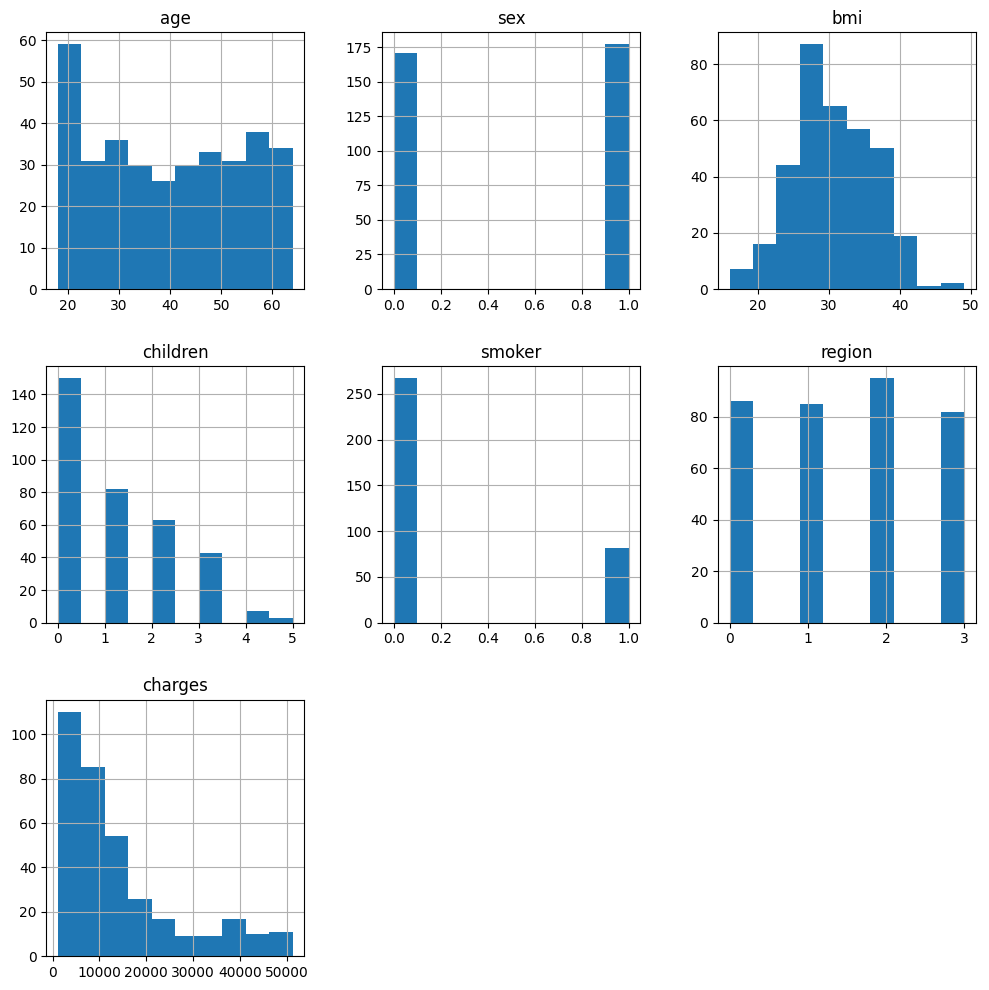

In [8]:
dados.hist(figsize=(12,12
                    ))

Como a coluna *age* não segue uma distribuição normal, iremos normalizar e não padronizar nossos dados!

# Aplicando IA aos nossos dados

No aprendizado supervisionado temos os dados de entrada do nosso modelo $\mathbf{x}_{i}$ e também conhecemos os labels deles $\mathbf{y}_{i}$, isto é o valor esperado da saída do modelo para cada entrada

Nos dados acima o índice $i$ é utilizado para diferenciar cada uma das diferentes pessoas das quais foram levantados os dados acima. **Quais deles poderiam ser nossas entradas e nossas saídas?**

**A resposta para isso depende para cada caso!** Para uma empresa que vende seguros, o ideal é ter um modelo que dado os seguintes atributos: **[sex, bmi, children, smoker, region]** eles possam calcular o valor que será cobrado do seguro para essa pessoa **[charges]**

A imagem a seguir ilustra esse exemplo de divisão de entradas e saídas.


<center>
<img src="https://drive.google.com/uc?export=view&id=1Yvziu9GlD5W-j-Zr1EJ3LAgY_yxbViYU" width="500">

Assim podemos criar um modelo que será treinado para fazer predições do valor de saída ($\hat{\mathbf{y}}_{i}$). O esquema para esse tipo de aprendizado supervisionado pode ser vizualizado a seguir:

<center>
<img src="https://drive.google.com/uc?export=view&id=1hFdoJXTk2jTR3zupjjqlr0dOKuaeOZCE" width="500">


A ideia acima parece muito interessante para criação de diversos modelos e pode ser utilizada em diferentes aplicações.

Entretanto, seria interessante ter uma ideia do quão bom é o nosso modelo, isto é, será que o modelo que criamos tem uma boa capacidade para estimar a sua saída ($\hat{\mathbf{y}}_{i}$) para novos dados?

O que estamos perguntando acima é a verificação da capacidade de generalização do nosso modelo, isto é, a capacidade do modelo de conseguir boas estimativas de saídas para novos dados.

## Divisão dos conjuntos de dados

Pensando na pergunta acima, existem duas possibilidades de soluções:



*   Poderíamos treinar um modelo com todos os nossos dados e vender o resultado disso para um empresa. A empresa posteriormente diria se o modelo está tendo um bom desempenho ou não. **Cenário ruim: Caso o modelo não esteja com um bom desempenho iriamos prejudicar o nome da empresa**
*   Poderíamos dividir os nossos dados em conjunto de treinamento e conjunto de teste. Dessa forma, treinariamos o modelo com o primeiro conjunto e poderíamos utilizar alguma métrica para avaliar o nosso modelo no segundo conjunto de dados. **Assim, teremos uma ideia do desempenho do nosso modelo antes de enviar ao cliente!**



Na imagem a seguir podemos ver o procedimento para trabalhar com o aprendizado supervisionado com a divisão dos dados em conjunto de treinamento ($\mathbf{X}_{train}$ e $\mathbf{y}_{train}$) e no conjunto de teste ($\mathbf{X}_{test}$ e $\mathbf{y}_{test}$)

<center>
<img src="https://drive.google.com/uc?export=view&id=1k3nIve0eo-zOjA48YouMHoKJOFfiabS6" width="600">




Dessa forma os nossos dados que possuem a dimensão de 348 exemplos com 6 colunas devem ser divididos em dois conjuntos para podermos trabalhar com o seu aprendizado supervisionado

## Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [9]:
# Dividindo em entrada e saída:
X = dados.drop(columns=['charges']) # Dados de entrada (X)
y = dados['charges']

# Dividindo em treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
# Normalização
normalizacao = MinMaxScaler()
normalizacao.fit(X_train) # obtendo o min e o max de cada coluna
# Transformando os dados com a normalização
X_train_norm = normalizacao.transform(X_train)
X_test_norm = normalizacao.transform(X_test)

No código acima pegamos os nossos dados e dividimos eles em conjunto de treinamento e teste, tendo os dados de entrada $\mathbf{X}$ e os dados de saída  $\mathbf{y}$

## Tarefa #2: Treinando os modelos

### Regressão Linear exemplo Valores do Seguro de Vida

Agora que entendemos o conceito da Regressão Linear vamos aplicar ela ao caso do seguro de vida. Vamos treinar o modelo utilizando o conjunto de dados de treinamento:

In [10]:
# Treinando o modelo de Regressão Linear:
reg_lin = LinearRegression()
reg_lin.fit(X_train_norm, y_train)

LinearRegression()

Agora vamos verificar os nossos valores obtidos de previsão desse modelo treinado:

In [11]:
# Predições do modelo:
y_pred_reg_lin = reg_lin.predict(X_test_norm)

In [12]:
y_pred_reg_lin

array([12178.03484436, 13856.73017444, 27499.61521925,  9165.35849592,
        8660.10443124, 12911.76767083, 29513.85410074, 29235.09456566,
       10818.76635734, 29396.36793141, 13719.11446397, 12303.3787634 ,
        2163.31446988, 13395.85272567, -2954.97696123, 39321.97771392,
       23977.31410772,  4452.3757228 , 14737.72116459,  7638.27986615,
       34183.83292   , 13814.10934123,  6229.52694445, 35799.12988667,
       29324.35672397, 13517.9499423 ,  4880.01533125, 11551.2012566 ,
        4640.14437778, 11382.46178295, 38639.90354944, 19227.02782846,
        3131.95251309, 14681.71149441,  3575.10725775, 39516.52950341,
        5301.75582473, 27677.61676563, 13558.41157125, 11178.77718014,
        8834.75785867, 32620.19449421,  3778.98208096,  3542.2244821 ,
         336.49838955,  5773.95851056, 26691.13621432, 17865.27816176,
       13566.41217277, 29089.70654496, 13277.8868994 ,  3205.38624   ,
       11044.66017964,  9660.35413246,  9374.32518292, 40688.89453873,
      

In [13]:
y_test

255    13047.33235
114    11488.31695
314    34838.87300
268     7441.05300
167     6128.79745
          ...     
93      5729.00530
180    11735.87905
183     7419.47790
197     8516.82900
325     6600.20595
Name: charges, Length: 70, dtype: float64

### Árvores de Decisão para regressão:

In [14]:
# Criando o modelo de Árvore de Decisão
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train_norm, y_train) # Treinando o modelo
# Obtendo as predições do modelo:
y_pred_tree_reg = tree_reg.predict(X_test_norm)

### Random Forest para regressão:

In [15]:
# Criando o modelo de Random Forest
forest_reg = RandomForestRegressor(max_depth=3)
forest_reg.fit(X_train_norm, y_train) # Treinando o modelo
# obtendo as predições do modelo:
y_pred_forest_reg = forest_reg.predict(X_test_norm)

### Gradient Boosting Regressor:

In [16]:
# Criando o Gradient Boosting Regressor
gbr = GradientBoostingRegressor(min_samples_leaf=5, n_estimators=50)
gbr.fit(X_train_norm, y_train) # Treinando o modelo
y_pred_gbr = gbr.predict(X_test_norm)

###Tarefa #3: Métricas de desempenho dos modelos


#### Mean Squared Error (MSE)

Mean squared error (MSE):
Em português, erro quadrático médio, essa métrica penaliza mais erros maiores, já que os erros (diferença entre o valor previsto e o correto) são elevados ao quadrado. Podemos ter dificuldade em interpretar no contexto real o que o erro obtido significa.

$MSE = \frac{1}{m}\sum^{m}_{i=1}(\hat{y}^{(i)}-y^{(i)})^{2}$

In [17]:
dados_RL = pd.DataFrame(data={'predição RL': y_pred_reg_lin,
                              'y_test': y_test,
                              'erro': (y_pred_reg_lin-y_test)**2})

In [18]:
dados_RL.head()

,predição RL,y_test,erro
255,12178.034844,13047.33235,7.556782e+05
114,13856.730174,11488.31695,5.609381e+06
314,27499.615219,34838.87300,5.386470e+07
268,9165.358496,7441.05300,2.973229e+06
167,8660.104431,6128.79745,6.407515e+06


In [19]:
dados_RL[ 'erro'].mean()

37726891.07038928

In [20]:
mean_squared_error(y_true=y_test,y_pred=y_pred_reg_lin)

37726891.07038928

#### Mean absolute error (MAE):
Em português, erro absoluto médio, essa métrica basicamente faz a média do erro absoluto de cada previsão. Facilita a interpretação no modelo real, mas temos sempre que ter em mente que erros maiores (outliers) podem atrapalhar muito a ideia obtida pela média:

$MAE = \frac{1}{m}\sum^{m}_{i=1}|\hat{y}^{(i)}-y^{(i)}|$

In [21]:
mean_absolute_error(y_true=y_test,
                    y_pred=y_pred_reg_lin)

4275.854668717768

#### R<sup>2</sup>:
O erro "R quadrado" é uma métrica que varia entre -∞ e 1 e é uma razão que indica o quão bom o nosso modelo está em comparação com um modelo "naive", que faz a predição com base no valor médio do target. Quanto maior seu valor, melhor é nosso modelo com relação a esse modelo mais simplista.

$R^{2} = 1- \frac{1}{m}\frac{\sum^{m}_{i=1}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum^{m}_{i=1}(y^{(i)}-\bar{y}^{(i)})^{2}}$

In [22]:
# quanto mais proximo de um melhor
r2_score(y_true=y_test,
                    y_pred=y_pred_reg_lin)

0.7918111887183533

#### Métricas para todos os modelos

Vamos agora obter todas as métricas dos modelos treinados para comparação:

In [23]:
predicoes_modelos = {"Regressão Linear":y_pred_reg_lin,
                     "Árvore de decisão":y_pred_tree_reg,
                     "Random Forest":y_pred_forest_reg,
                     "Gradient Boosting Regressor":y_pred_forest_reg}

In [24]:
for nome_reg, y_pred in predicoes_modelos.items():
  print("="*25)
  print(nome_reg)
  print(f"MSE = {mean_squared_error(y_true=y_test,y_pred=y_pred)}")
  print(f"MAE = {mean_absolute_error(y_true=y_test,y_pred=y_pred)}")
  print(f"R2 = {r2_score(y_true=y_test,y_pred=y_pred)}")

Regressão Linear
MSE = 37726891.07038928
MAE = 4275.854668717768
R2 = 0.7918111887183533
Árvore de decisão
MSE = 23084002.21618503
MAE = 3109.3056937113743
R2 = 0.8726152395636328
Random Forest
MSE = 18341313.30850934
MAE = 2678.809221799792
R2 = 0.8987868836602919
Gradient Boosting Regressor
MSE = 18341313.30850934
MAE = 2678.809221799792
R2 = 0.8987868836602919


Podemos observar que o melhor modelo (menor MAE e MSE e maior R2 score) é o Gradient Boosting Regressor

# Exercício

Vamos analisar um conjunto de dados de jogadores de Counter Striker e aplicar um modelo de regressão linear desses dados. O conjunto de dados é carregado a seguir:

In [25]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1tLbBqTphKeaYTSvj_vKQS759qtrw51Vk'
gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './cs_data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
cs_data = pd.read_csv("cs_data.csv", index_col=0 )

672.0 KiB Done.


Responder os itens solicitados na sequencia:

a) Fazer a análise dos dados

In [26]:
# seu código aqui
cs_data.head()

,Ping,Kills,Assists,Deaths,MVP,HSP,Score
Player Name,,,,,,,
DNB,45,38,4,20,8,42,90
link1n,31,22,3,17,5,54,51
sn0w,42,14,4,20,0,40,42
reedkihaddi,90,13,3,23,0,28,33
pEhnol,33,11,4,27,0,54,26


b) Fazer a análise estatística dos dados

In [27]:
# seu código aqui

c) Fazer a divisão dos dados em conjunto de treinamento e teste, sendo o Score o valor que desejamos como saída do modelo

Obs.: Para o conjunto de dados de entrada, excluir TAMBÉM a coluna Player id. (Essa coluna é apenas o nome dos jogadores e não possui nenhuma informação)

In [28]:
# seu código aqui

d) Para os dados que foram divididos anteriormente, realizar o seu treinamento com um modelo de Regressão Linear

In [29]:
# seu código aqui

e) Fazer a previsão para o conjunto dos dados de teste

In [30]:
# seu código aqui

f) Calcular as métricas de desempenho

# Referencia Bibliográfica:



GÉRON, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Sebastopol: O’reilly Media, 2017